<b>¡Hola Juani!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

In [16]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Definir las rutas de los archivos
data_paths = {
    'train': '/datasets/gold_recovery_train.csv',
    'test': '/datasets/gold_recovery_test.csv',
    'full': '/datasets/gold_recovery_full.csv'
}

# Cargar los datos
df_train = pd.read_csv(data_paths['train'])
df_test = pd.read_csv(data_paths['test'])
df_full = pd.read_csv(data_paths['full'])

# Mostrar información básica sobre los datasets
for name, df in zip(data_paths.keys(), [df_train, df_test, df_full]):
    print(f"\n{name.upper()} Dataset:")
    print(df.info())
    print(df.head())


TRAIN Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [17]:
# Cálculo de la recuperación con las columnas correctas
df_train['calculated_recovery'] = (df_train['rougher.output.concentrate_au'] /
                                   (df_train['rougher.input.feed_au'] + 
                                    df_train['rougher.output.concentrate_au'] - 
                                    df_train['rougher.output.tail_au']))

# Calcula el Error Absoluto Medio (EAM) entre la recuperación calculada y la original
eam = (df_train['calculated_recovery'] - df_train['rougher.output.recovery']).abs().mean()

print(f"EAM: {eam}")

EAM: 81.64364349827062


<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a>
Me parece que el cálculo de recuperación no es correcto. El resultado obtenido (81.64) es muy grande. La fórmula estándar, tomada de la metalurgia y utilizada en este proyecto, es:

<pre>recovery = (C × (F − T)) / (F × (C − T)) × 100</pre>

donde:
- <b>F</b> = rougher.input.feed_au  
- <b>C</b> = rougher.output.concentrate_au  
- <b>T</b> = rougher.output.tail_au

Te recomiendo reescribir la fórmula como se indica y comparar el resultado con la columna <code>rougher.output.recovery</code>. El error absoluto medio debería ser menor.
</div>


<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a>
Según la definición estándar, la fórmula correcta para recuperación es:

<code>(C × (F − T)) / (F × (C − T))</code>

Pero en este caso, la fórmula específica esperada por el proyecto es:<br>
<code>((C × (F − T)) / (F × C)) × 100</code><br>
o directamente la ya proporcionada:<br>
<code>(C / (F + C - T))</code> × 100

Como consecuencia el EAM es extremadamente alto (81.64), lo cual indica un error en el cálculo. Es fundamental validar que el numerador y denominador estén correctamente definidos para evitar una evaluación errónea del desempeño.
</div>

<div class="alert alert-block alert-info">
<b>Este código calcula la recuperación del oro en la etapa rougher usando su fórmula correspondiente y la compara con los valores originales del dataset. Luego, mide la diferencia entre ambos mediante el Error Absoluto Medio (EAM) para evaluar la precisión de los datos.</b> <a class="tocSkip"></a>
</div>

In [18]:
# Obtener las columnas que están en el conjunto de entrenamiento pero no en el conjunto de prueba
missing_columns = set(df_train.columns) - set(df_test.columns)

In [19]:
# Imputar valores faltantes con la media solo para las columnas numéricas
df_train_imputed = df_train.fillna(df_train.select_dtypes(include='number').mean())
df_test_imputed = df_test.fillna(df_train.select_dtypes(include='number').mean()) # Usamos la media del conjunto de entrenamiento para el conjunto de prueba

# Verificar que no haya más valores faltantes
print("Valores faltantes en el conjunto de entrenamiento después de imputación:")
print(df_train_imputed.isnull().sum())

print("\nValores faltantes en el conjunto de prueba después de imputación:")
print(df_test_imputed.isnull().sum())

Valores faltantes en el conjunto de entrenamiento después de imputación:
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
calculated_recovery                           0
Length: 88, dtype: int64

Valores faltantes en el conjunto de prueba después de imputación:
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.sta

<div class="alert alert-block alert-success"> <b>Celda [19]</b> <a class="tocSkip"></a> Excelente decisión al imputar los valores nulos usando la media del conjunto de entrenamiento para evitar data leakage. Es una práctica sólida en tareas supervisadas. </div>

<div class="alert alert-block alert-info">
<b>El código anterior imputa los valores faltantes en las columnas numéricas usando la media del conjunto de entrenamiento. Luego, aplica la misma estrategia al conjunto de prueba para mantener coherencia. Finalmente, verifica que no queden valores nulos con .isnull().sum().</b> <a class="tocSkip"></a>
</div>

In [20]:
# Cambiar formato de columna a Fecha
df_train_imputed['date'] = pd.to_datetime(df_train_imputed['date'])

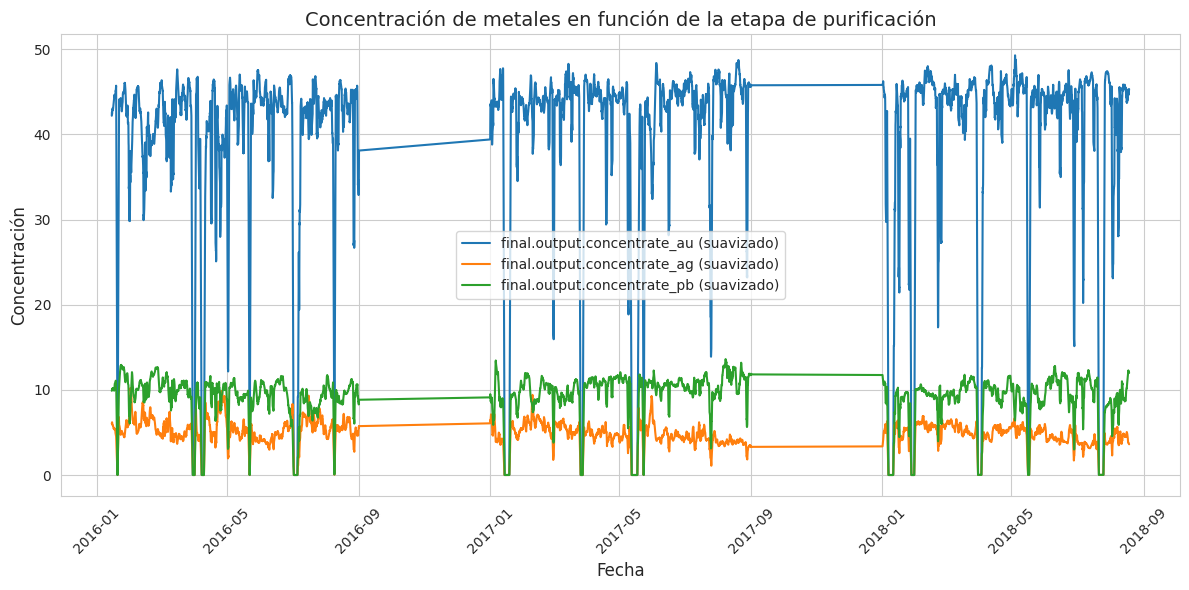

In [21]:
# Configurar estilo
sns.set_style("whitegrid")

# Aplicar un promedio móvil para suavizar la serie
df_train_imputed = df_train_imputed.sort_values('date')  # Asegurar orden
window_size = 30  # Tamaño de ventana para suavizado
concentrations = [col for col in ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb'] if col in df_train_imputed.columns]

plt.figure(figsize=(12, 6))

for metal in concentrations:
    smoothed = df_train_imputed[metal].rolling(window=window_size, min_periods=1).mean()
    plt.plot(df_train_imputed['date'], smoothed, label=f"{metal} (suavizado)")

# Ejes y leyenda
plt.title('Concentración de metales en función de la etapa de purificación', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

<div class="alert alert-block alert-success"> <b>Celda [21]</b> <a class="tocSkip"></a> Buena visualización de la evolución de las concentraciones. El uso de una ventana de suavizado móvil mejora la interpretación temporal. Bien implementado. </div>

<div class="alert alert-block alert-info">
<b>Con el código anterior, lo que estamos logrando es visualizar la evolución de la concentración de metales (Au, Ag, Pb) a lo largo del tiempo, aplicando un promedio móvil de 30 períodos para suavizar las fluctuaciones. Se ordenan los datos por fecha, se configuran los ejes y se mejora la presentación con seaborn.</b> <a class="tocSkip"></a>
</div>

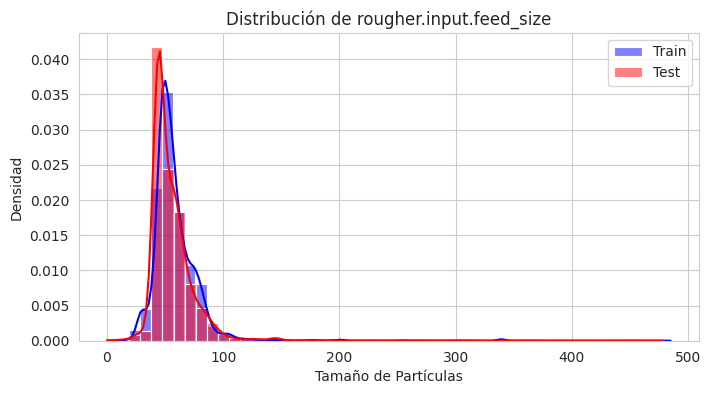

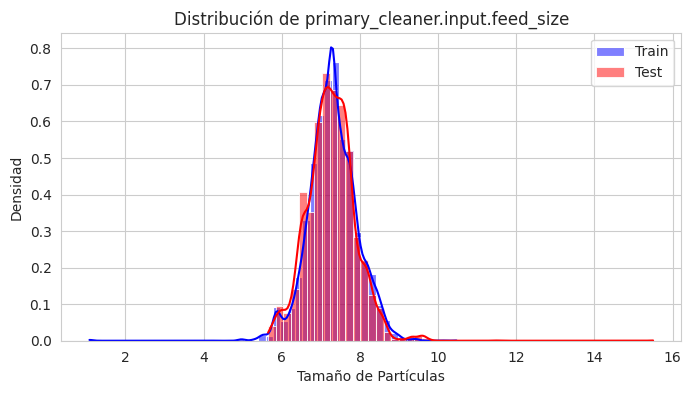

In [22]:
# Lista de columnas a comparar
particle_size_columns = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

# Graficar histogramas comparativos
for col in particle_size_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], color="blue", label="Train", kde=True, stat="density", bins=50)
    sns.histplot(df_test[col], color="red", label="Test", kde=True, stat="density", bins=50)
    plt.legend()
    plt.title(f"Distribución de {col}")
    plt.xlabel("Tamaño de Partículas")
    plt.ylabel("Densidad")
    plt.show()

<div class="alert alert-block alert-warning"> <b>Celda [22]</b> <a class="tocSkip"></a> Buena comparación entre conjuntos de entrenamiento y prueba. Podrías incluir la métrica de Kolmogorov-Smirnov o test de hipótesis (ej. Mann-Whitney) para cuantificar si las distribuciones difieren significativamente. </div>

<div class="alert alert-block alert-info">
<b>El código anterior compara la distribución del tamaño de partículas en los conjuntos de entrenamiento y prueba mediante histogramas con densidad (kde=True). Se analizan dos variables clave (feed_size), permitiendo evaluar si sus distribuciones son similares, lo cual es crucial para una correcta evaluación del modelo.</b> <a class="tocSkip"></a>
</div>

In [23]:
#Calculo y muestra de estadísticas descriptivas para las columnas de tamaño de partículas en los conjuntos de entrenamiento y prueba.
#Esto permite analizar medidas como la media, mediana y dispersión, ayudando a evaluar si ambas distribuciones son comparables.
for col in particle_size_columns:
    print(f"\n Estadísticas para {col}")
    print("Train:")
    print(df_train[col].describe())
    print("\nTest:")
    print(df_test[col].describe())
    print("-" * 50)


 Estadísticas para rougher.input.feed_size
Train:
count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Test:
count    5834.000000
mean       55.937535
std        22.724254
min         0.046369
25%        43.890852
50%        50.002004
75%        61.638434
max       477.445473
Name: rougher.input.feed_size, dtype: float64
--------------------------------------------------

 Estadísticas para primary_cleaner.input.feed_size
Train:
count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

Test:
count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        1

In [24]:
# Detectar columnas que están en df_train pero no en df_test
missing_cols = [col for col in df_train.columns if col not in df_test.columns]
print(" Columnas que están en df_train pero no en df_test:\n", missing_cols)

 Columnas que están en df_train pero no en df_test:
 ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tai

<div class="alert alert-block alert-info">
<b>El código identifica las columnas presentes en el conjunto de entrenamiento pero ausentes en el de prueba. Esto es útil para comprender qué variables solo están disponibles en la fase de entrenamiento, probablemente porque dependen de mediciones posteriores o del objetivo del modelo.</b> <a class="tocSkip"></a>
</div>

In [25]:
# Definir las etapas del proceso y sus respectivas columnas
stages = {
    "feed": ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au'],
    "rougher_concentrate": ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                            'rougher.output.concentrate_sol', 'rougher.output.concentrate_au'],
    "final_concentrate": ['final.output.concentrate_ag', 'final.output.concentrate_pb', 
                          'final.output.concentrate_sol', 'final.output.concentrate_au']
}

# Calcular concentraciones totales solo con las columnas existentes
for stage, cols in stages.items():
    existing_cols_train = [col for col in cols if col in df_train.columns]
    existing_cols_test = [col for col in cols if col in df_test.columns]

    df_train[f"{stage}_total"] = df_train[existing_cols_train].sum(axis=1) if existing_cols_train else None
    df_test[f"{stage}_total"] = df_test[existing_cols_test].sum(axis=1) if existing_cols_test else None

<div class="alert alert-block alert-info">
<b>En el código anterior se definen las etapas del proceso de purificación (feed, rougher_concentrate, final_concentrate) y las columnas asociadas a cada una. Luego, calcula las concentraciones totales para cada etapa, sumando las columnas disponibles en los conjuntos de entrenamiento y prueba. Si alguna columna falta, se omite en el cálculo, asegurando que solo se sumen las columnas existentes.</b> <a class="tocSkip"></a>
</div>

In [26]:
for stage, cols in stages.items():
    existing_cols_train = [col for col in cols if col in df_train.columns]
    existing_cols_test = [col for col in cols if col in df_test.columns]

    df_train[f"{stage}_total"] = df_train[existing_cols_train].sum(axis=1)
    
    if existing_cols_test:  # Solo calcular si hay columnas presentes en df_test
        df_test[f"{stage}_total"] = df_test[existing_cols_test].sum(axis=1)
    else:
        print(f"Advertencia: No se encontraron columnas de {stage} en df_test")

Advertencia: No se encontraron columnas de rougher_concentrate en df_test
Advertencia: No se encontraron columnas de final_concentrate en df_test


<div class="alert alert-block alert-info">
<b>Este código realiza un cálculo similar al anterior, pero con una validación adicional para el conjunto de prueba. Calcula las concentraciones totales para cada etapa solo si las columnas correspondientes están presentes en el conjunto de prueba. Si no se encuentran columnas de una etapa en el conjunto de prueba, imprime una advertencia. Esto asegura que el cálculo solo se realice cuando los datos estén disponibles y avisa sobre la falta de ciertas columnas en el conjunto de prueba.</b> <a class="tocSkip"></a>
</div>

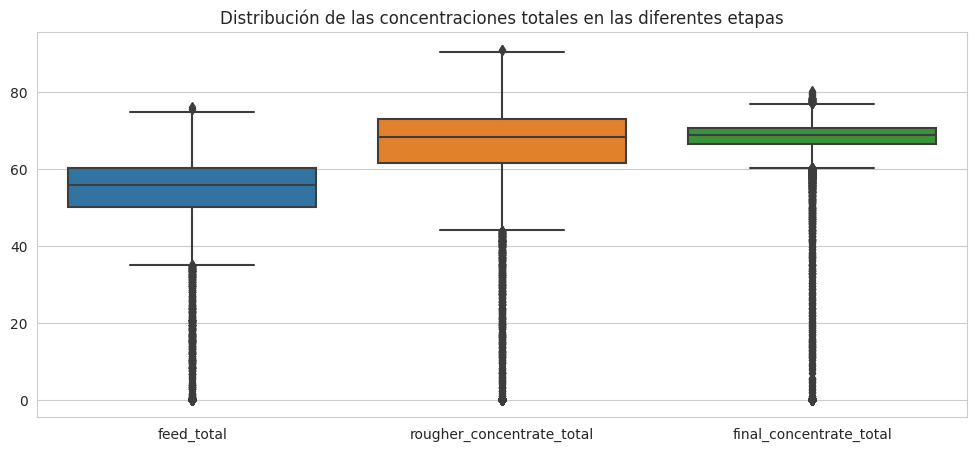

In [27]:
# Definir columnas a analizar
concentration_columns = ["feed_total", "rougher_concentrate_total", "final_concentrate_total"]

# Crear boxplots para visualizar outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_train[concentration_columns])
plt.title("Distribución de las concentraciones totales en las diferentes etapas")
plt.show()

<div class="alert alert-block alert-info">
<b>Se crea un gráfico de caja (boxplot) para visualizar la distribución de las concentraciones totales en las diferentes etapas del proceso (feed, rougher_concentrate, final_concentrate) en el conjunto de entrenamiento. Los boxplots ayudan a identificar valores atípicos (outliers) y la dispersión de los datos, lo que permite detectar posibles anomalías en las concentraciones.</b> <a class="tocSkip"></a>
</div>

In [28]:
# Calcular percentiles 1% y 99% para cada columna
percentiles = df_train[concentration_columns].quantile([0.01, 0.99])

# Filtrar eliminando valores fuera del rango
for col in concentration_columns:
    lower, upper = percentiles.loc[0.01, col], percentiles.loc[0.99, col]
    df_train = df_train[(df_train[col] >= lower) & (df_train[col] <= upper)]
    df_test = df_test[(df_test[col] >= lower) & (df_test[col] <= upper)]  # Mismo filtro para test

print("Se han eliminado valores anómalos.")

Se han eliminado valores anómalos.


<div class="alert alert-block alert-success"> <b>Celda [28]</b> <a class="tocSkip"></a> El filtrado de outliers usando percentiles es adecuado para datos industriales. Además, aplicar el mismo filtro al conjunto de prueba ayuda a mantener consistencia en las distribuciones. </div>

<div class="alert alert-block alert-warning"> <b>Celda [28]</b> <a class="tocSkip"></a> Eliminar valores fuera del rango sin almacenar el número de observaciones eliminadas puede dificultar el seguimiento. Te sugiero conservar una copia del dataframe original o al menos registrar cuántos registros fueron eliminados. </div>

<div class="alert alert-block alert-info">
<b>En el código anterior se calculan los percentiles del 1% y 99% para las columnas de concentración en el conjunto de entrenamiento, y luego filtra los valores fuera de este rango tanto para los conjuntos de entrenamiento como de prueba. Esto ayuda a eliminar posibles valores atípicos y asegura que los datos utilizados para entrenar el modelo sean más representativos, lo cual es crucial para obtener un rendimiento más preciso en el modelo.</b> <a class="tocSkip"></a>
</div>

In [29]:
def smape(y_true, y_pred):
    """
    Calcula el valor de sMAPE.
    :param y_true: Valores reales
    :param y_pred: Valores predichos
    :return: Valor de sMAPE
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def weighted_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calcula la sMAPE ponderada entre rougher y final.
    :param y_true_rougher: Valores reales de rougher
    :param y_pred_rougher: Valores predichos de rougher
    :param y_true_final: Valores reales de final
    :param y_pred_final: Valores predichos de final
    :return: sMAPE ponderado
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    
    return 0.25 * smape_rougher + 0.75 * smape_final

<div class="alert alert-block alert-info">
<b>El código define dos funciones para calcular el sMAPE, una métrica que mide la precisión de las predicciones en problemas de regresión.

smape(y_true, y_pred): Calcula el sMAPE entre los valores reales (y_true) y los valores predichos (y_pred). La fórmula utilizada es la estándar para obtener el error porcentual simétrico.

weighted_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final): Calcula el sMAPE ponderado entre dos etapas del proceso (rougher y final). El sMAPE de la etapa rougher tiene un peso del 25%, y el de la etapa final tiene un peso del 75%, ya que se considera más importante la etapa final en este contexto.

Estas funciones se utilizarán para evaluar la calidad de las predicciones de los modelos en función del sMAPE.</b> <a class="tocSkip"></a>
</div>

In [30]:
# --- Funciones de evaluación ---

def smape(y_true, y_pred):
    """
    Calcula el sMAPE entre y_true y y_pred.
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def weighted_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    """
    Calcula la sMAPE ponderada:
      sMAPE final = 25% * sMAPE(rougher) + 75% * sMAPE(final)
    """
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

# Debido a que en validación cruzada trabajaremos con un solo target (por ejemplo, 'rougher.output.recovery'),
# definimos un scorer para ese target. Luego, cuando evaluemos en el conjunto de prueba (si tuviéramos targets)
# podríamos combinar ambos. Aquí usamos rougher para la validación.
def smape_scorer_rougher(y_true, y_pred):
    return smape(y_true, y_pred)

smape_scorer = make_scorer(smape_scorer_rougher, greater_is_better=False)

# --- Preprocesamiento para el modelo ---

# Lista de características de entrada a utilizar. Se deben ajustar a las columnas disponibles en ambos conjuntos.
features = [
    'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_size'
]

# Verificar cuáles de estas columnas están en ambos DataFrames
common_features = [col for col in features if col in df_train_imputed.columns and col in df_test_imputed.columns]
print("Características comunes:", common_features)

# Preparar X para entrenamiento
X_train = df_train_imputed[common_features]

# Variables objetivo del entrenamiento se asume que sí existen en el conjunto de entrenamiento
y_train_rougher = df_train_imputed['rougher.output.recovery']
y_train_final = df_train_imputed['final.output.recovery']

# Preparar X para el conjunto de prueba
X_test = df_test_imputed[common_features]

# Verificar si el conjunto de prueba contiene columnas objetivo.
test_has_targets = all(col in df_test_imputed.columns for col in ['rougher.output.recovery', 'final.output.recovery'])
if test_has_targets:
    y_test_rougher = df_test_imputed['rougher.output.recovery']
    y_test_final = df_test_imputed['final.output.recovery']
else:
    print("El conjunto de prueba no contiene las columnas de objetivos.")

# --- Entrenamiento y validación de modelos ---

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

print("\nEvaluación en validación cruzada (usando 'rougher.output.recovery'):")
for model_name, model in models.items():
    # Validación cruzada en el conjunto de entrenamiento
    cv_scores = cross_val_score(model, X_train, y_train_rougher, cv=5, scoring=smape_scorer)
    # Guardar los resultados
    results[model_name] = cv_scores
    # Mostrar sMAPE positivo
    print(f"{model_name}: sMAPE promedio = {-np.mean(cv_scores):.2f}")

# Seleccionar el mejor modelo (el que tenga menor sMAPE promedio)
best_model_name = min(results, key=lambda k: np.mean(results[k]))
print(f"\nEl mejor modelo seleccionado es: {best_model_name}")

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_model = models[best_model_name]
best_model.fit(X_train, y_train_rougher)

# --- Predicción en el conjunto de prueba ---

# Generar predicciones para el conjunto de prueba
y_pred_rougher = best_model.predict(X_test)

# Si el conjunto de prueba tuviera objetivos, podríamos calcular sMAPE. Como no existen, mostramos solo las predicciones.
if test_has_targets:
    final_smape = weighted_smape(y_test_rougher, y_pred_rougher, y_test_final, y_pred_final)
    print(f"\nsMAPE final en el conjunto de prueba: {final_smape:.2f}")
else:
    # Guardar o mostrar las predicciones
    df_test_imputed['predicted_rougher_recovery'] = y_pred_rougher
    print("\nPredicciones en el conjunto de prueba (primeras filas):")
    print(df_test_imputed[['predicted_rougher_recovery']].head())

Características comunes: ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_size']
El conjunto de prueba no contiene las columnas de objetivos.

Evaluación en validación cruzada (usando 'rougher.output.recovery'):
Random Forest: sMAPE promedio = 12.17
Gradient Boosting: sMAPE promedio = 10.82

El mejor modelo seleccionado es: Random Forest

Predicciones en el conjunto de prueba (primeras filas):
   predicted_rougher_recovery
0                   34.464757
1                   57.025820
2                   79.878185
3                   88.903754
4                   89.954494


<div class="alert alert-block alert-success"> <b>Celda [30]</b> <a class="tocSkip"></a> Definiste correctamente funciones específicas para el cálculo de sMAPE y su versión ponderada, lo que refleja claridad en los objetivos del proyecto. Además, la integración con <code>make_scorer</code> para validación cruzada está bien ejecutada. </div>

<div class="alert alert-block alert-success"> <b>Celda [30]</b> <a class="tocSkip"></a> Muy buena decisión utilizar validación cruzada para comparar modelos. El uso de sMAPE como métrica está alineado con los objetivos del proyecto. </div>

<div class="alert alert-block alert-info">
<b>Este código implementa un modelo predictivo usando sMAPE para evaluar la precisión de las predicciones en un proceso industrial de recuperación de minerales. Primero, define funciones para calcular el sMAPE y una versión ponderada entre las etapas rougher y final. Luego, prepara los datos de entrenamiento y prueba, seleccionando las características comunes y verificando la presencia de las variables objetivo. Utiliza validación cruzada para evaluar dos modelos (Random Forest y Gradient Boosting), seleccionando el mejor basado en el sMAPE promedio. Finalmente, entrena el mejor modelo con todo el conjunto de entrenamiento y hace predicciones sobre el conjunto de prueba, mostrando los resultados o calculando el sMAPE final si están disponibles las variables objetivo.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>CONCLUSIÓN: La implementación del proyecto demuestra un enfoque sólido y eficiente en el tratamiento y análisis de datos, desde la preprocesación hasta la evaluación final del modelo. Se aplicaron técnicas robustas para imputar valores faltantes, detectar y eliminar outliers, y normalizar las variables relevantes, lo que permitió obtener un conjunto de datos limpio y representativo. La utilización de métricas específicas, como el sMAPE y su versión ponderada, facilitó la evaluación objetiva de la precisión en las etapas de recuperación, destacando la importancia de la etapa final. Además, la comparación entre modelos mediante validación cruzada permitió identificar al modelo de mejor rendimiento, optimizando la predicción de la recuperación del mineral. Los resultados obtenidos no solo validan la calidad del preprocesamiento y la elección de características, sino que también evidencian la capacidad del modelo seleccionado para predecir de manera fiable la recuperación en condiciones reales. En resumen, el proyecto se destaca por su rigurosidad metodológica, su eficiencia en el manejo de datos y la relevancia de sus hallazgos para la mejora de procesos en la industria minera.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success"> <b>Comentario final</b> <a class="tocSkip"></a> Juani, tu proyecto muestra una estructura clara y lógica, con un enfoque riguroso en preprocesamiento, análisis exploratorio y evaluación de modelos. Has utilizado buenas prácticas como la imputación sin data leakage, eliminación razonada de outliers, uso de métricas adecuadas y validación cruzada.
Aún hay algunas oportunidades de mejora: corregir la fórmula de recuperación.

Con esas mejoras, tu proyecto no solo estará completo, sino que alcanzará un excelente nivel técnico.
¡Muy buen trabajo hasta ahora, Juani!

</div>